In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
from skimage import io

# Specify the path to your dataset
path = '/content/drive/My Drive/Datasets for Assignment/Dataset 3/Mars Surface Images Dataset/Mars Surface Dataset/calibrated'

# Initialize lists to store images and filename
images = []
filenames = []

# Iterate through the directory and load each JPG image
for filename in os.listdir(path):
    if filename.endswith('.JPG'):
        image_path = os.path.join(path, filename)
        img = io.imread(image_path)
        images.append(img)
        filenames.append(filename)



pre-processing techniques
Ensure all images are valid and non-corrupt:

In [4]:
# Remove corrupted or unreadable images
clean_images = []
clean_filenames = []

for img, filename in zip(images, filenames):
    try:
        # Ensure the image is not empty or corrupted
        if img is not None and img.shape[-1] == 3:  # Check if it has 3 color channels
            clean_images.append(img)
            clean_filenames.append(filename)
    except Exception as e:
        print(f"Error loading image {filename}: {e}")

print(f"Total clean images: {len(clean_images)}")
print(f"Total clean images: {len(images)}")


Total clean images: 6553
Total clean images: 6737


In [5]:
from skimage.transform import resize

# Define target dimensions
target_height, target_width = 224, 224

# Resize all images
resized_images = []
for img in clean_images:
    resized = resize(img, (target_height, target_width), anti_aliasing=True)
    resized_images.append(resized)

print(f"Resized images to {target_height}x{target_width}")

Resized images to 224x224


In [8]:
resized_images

[array([[[0.42190876, 0.28073229, 0.19441777],
         [0.39285714, 0.25168067, 0.16328531],
         [0.41234494, 0.27116847, 0.17705082],
         ...,
         [0.42905162, 0.36630652, 0.31532613],
         [0.46068427, 0.40366146, 0.35268107],
         [0.5597439 , 0.50480192, 0.45382153]],
 
        [[0.73217287, 0.58937575, 0.50164066],
         [0.55852341, 0.4165066 , 0.32070828],
         [0.54051621, 0.3984994 , 0.30270108],
         ...,
         [0.53589436, 0.47146859, 0.41964786],
         [0.5557423 , 0.49131653, 0.4394958 ],
         [0.63893557, 0.58179272, 0.52919168]],
 
        [[0.74747899, 0.59613846, 0.50240096],
         [0.61606643, 0.47006803, 0.36730692],
         [0.59581833, 0.44651861, 0.34545818],
         ...,
         [0.54505802, 0.47396959, 0.41906763],
         [0.57130852, 0.49961985, 0.44471789],
         [0.6615046 , 0.5954982 , 0.5382553 ]],
 
        ...,
 
        [[0.63915566, 0.46128451, 0.33187275],
         [0.67170868, 0.49329732, 0.36388

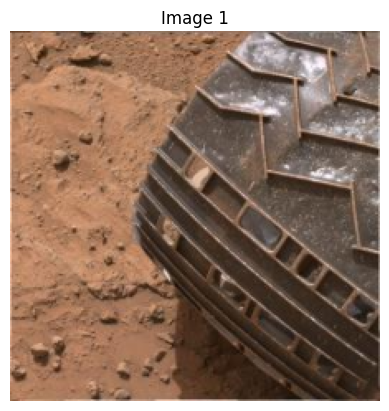

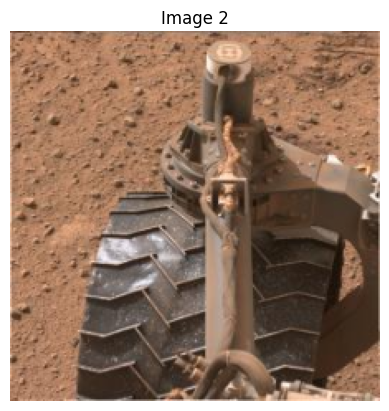

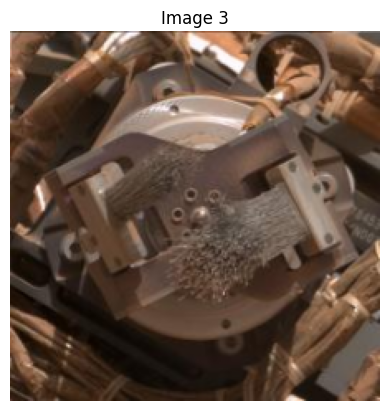

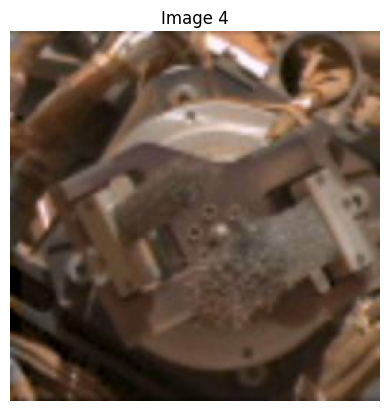

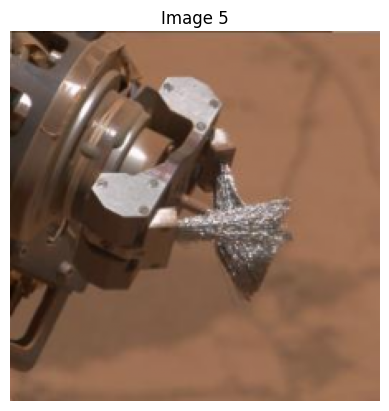

In [9]:
import matplotlib.pyplot as plt

# Display the first 5 resized images
for i in range(5):
    plt.imshow(resized_images[i])  # Show the image
    plt.title(f"Image {i+1}")      # Add a title for reference
    plt.axis('off')                # Turn off axis
    plt.show()